In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
path = "C:\\Users\\Parth\\OneDrive - purdue.edu\\Spring 2023\\ECE ML\\Homework\\HW3\\homework3_data\\data\\"

train_cat = np.matrix(np.loadtxt(path + 'train_cat.txt', delimiter = ','))
train_grass = np.matrix(np.loadtxt(path + 'train_grass.txt', delimiter = ','))


Dimensions of the image are (375, 500)


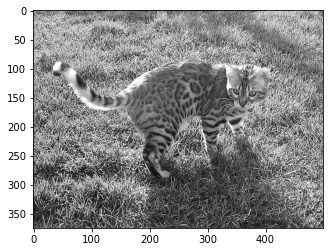

In [3]:
Y = plt.imread(path + 'cat_grass.jpg') / 255
plt.imshow(Y,cmap='gray')
print(f"Dimensions of the image are {Y.shape}")

In [4]:
train_cat = []

with open(path + 'train_cat.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    for data in csv_reader:
      train_cat.append(data)

train_cat = np.array(train_cat, dtype='float64')
train_cat = train_cat.T
K1 = train_cat.shape[0]
print(f"K1 = {K1}")

K1 = 1976


In [5]:
train_grass = []

with open(path + 'train_grass.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    for data in csv_reader:
      train_grass.append(data)

train_grass = np.array(train_grass, dtype='float64')
train_grass = train_grass.T
K0 = train_grass.shape[0]
print(f"K0 = {K0}")

K0 = 9556


In [6]:
pi_1 = K1/(K1 + K0)
pi_0 = 1 - pi_1

print(f"pi_0 = {pi_0:.2f}, pi_1 = {pi_1:.2f}")

pi_0 = 0.83, pi_1 = 0.17


In [7]:
mu_0 = np.zeros(64)
for i in range(train_grass.shape[0]):
  mu_0 = mu_0 + train_grass[i]
mu_0 = mu_0/train_grass.shape[0]

mu_1 = np.zeros(64)
for i in range(train_cat.shape[0]):
  mu_1 = mu_1 + train_cat[i]
mu_1 = mu_1/train_cat.shape[0]

print(f"The first few values in mu_0 are: {mu_0[:2]}")
print(f"The first few values in mu_1 are: {mu_1[:2]}")

The first few values in mu_0 are: [0.48249575 0.4864399 ]
The first few values in mu_1 are: [0.44080734 0.43871359]


In [8]:
sigma_0 = np.zeros((64, 64))
for i in train_grass:
  for x in range(i.shape[0]):
    for y in range(i.shape[0]):
      sigma_0[x][y] += i[x]*i[y]
sigma_0 = sigma_0/(train_grass.shape[0 ] - 1)

sigma_1 = np.zeros((64, 64))
for i in train_cat:
  for x in range(i.shape[0]):
    for y in range(i.shape[0]):
      sigma_1[x][y] += i[x]*i[y]
sigma_1 = sigma_1/(train_cat.shape[0] - 1)

In [106]:
print(f"The first few values in sigma_0 are: \n{sigma_0[:2,:2]}")
print(f"The first few values in sigma_1 are: \n{sigma_1[:2,:2]}")

The first few values in sigma_0 are: 
[[0.29731052 0.27164655]
 [0.27164655 0.30288311]]
The first few values in sigma_1 are: 
[[0.23748781 0.22884014]
 [0.22884014 0.23505457]]


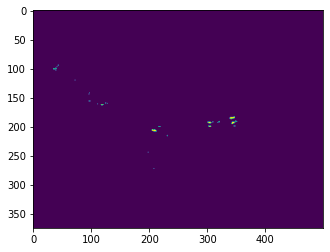

In [133]:
M,N = Y.shape
mask = np.zeros(Y.shape)
for i in range(M-8):
  for j in range(N-8):
    block = Y[i:i+8, j:j+8] # This is a 8x8 block
    block = block.flatten()
    LHS = -0.5*np.matmul(np.matmul((block - mu_1).T, np.linalg.inv(sigma_1)),block - mu_1) + np.log(pi_1) - 0.5*np.linalg.det(sigma_1)
    RHS = -0.5*np.matmul(np.matmul((block - mu_0).T, np.linalg.inv(sigma_0)),block - mu_0) + np.log(pi_0) - 0.5*np.linalg.det(sigma_0)
    mask[i,j] = 1 if (LHS>= RHS) else 0

plt.imshow(mask)

In [131]:
truth = plt.imread('truth.png')
truth = np.array(truth, dtype='float64')
MAE = 0
M,N = mask.shape
for i in range(M):
  for j in range(N):
    MAE += abs(mask[i,j] - truth[i,j])

MAE = MAE/(M*N)
MAE

0.16774094646835327

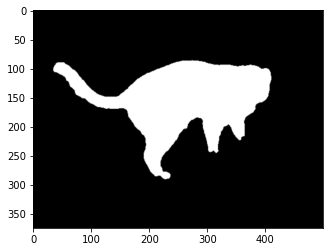

In [132]:
truth = plt.imshow(truth, cmap="gray")